# Wing Aerodynamics Analysis using Vortex-Step Method (VSM), Lift Line Theory (LLT), Vortex Lattice Method (VSM) and Computational Fluid Dynamics(CFD)
This notebook demonstrates the process of setting up and analyzing a wing's aerodynamics using VSM, LLT, VLM and CFD. We'll cover the following steps:
1. Setting up the environment and importing necessary libraries.
2. Process the data and store in processed_data
3. Run the solver, iteratively for multiple angles of attack
4. Store the results in results folder

## 1. Import necessary libraries
In this step, we import the necessary libraries for the aerodynamic analysis. We use:
- `numpy` for numerical operations.
- The `VSM` module for the aerodynamic modelling.
- The 'SurfplanAdapter' module to adapt SP files for the VSM module.

Make sure the `VSM` module is properly installed in your (virtual) environment, by running the cmd: `pip install -e .` from the root-directory of the `VSM` project.

Make sure the `SurfplanAdapter` module is properly installed in your (virtual) environment, by running the cmd: `pip install -e .` from the root-directory of the `SurfplanAdapter-main` project.

In [7]:
import numpy as np
import os
import logging
from pathlib import Path
import matplotlib.pyplot as plt
from SurfplanAdapter.surfplan_to_vsm.generate_vsm_input import (
    generate_VSM_input,
)
from SurfplanAdapter.logging_config import *
from VSM.Solver import Solver
import VSM.plotting as plotting


## 2. Process the data and store in processed_data

We create a `WingAerodynamics` object, from a `.txt` file, with the `generate_VSM_input` function through the following inputs : 
- `filepath` (str): the path to the kite 3D .txt extracted from Surfplan 
- `n_panels` (int): Number of panels to be used in the aerodynamic mesh
- `spanwise_panel_distribution` (str): Spanwise panel distribution type, sub-options:
    - `"linear"`: Linear distribution, even distribution
    - `"cosine"`: Cosine distribution, alots higher panel concetration near the tips and less mid-span
    - `"cosine_van_Garrel"`: Cosine distribution based on van Garrel method
    - `"split_provided"`: Keeps the original provided sections, and splits these evenly.
    - `"unchanged"`: Keep the original provided sections unchanged
- `is_save_geometry` (bool): choose to save or not the geometry in a .csv file
- `csv_file_path` (str): the file path where to save the .csv file

In [8]:
# Find the root directory of the repository
root_dir = os.path.abspath(os.getcwd())
while not os.path.isfile(os.path.join(root_dir, ".gitignore")):
    root_dir = os.path.abspath(os.path.join(root_dir, ".."))
    if root_dir == "/":
        raise FileNotFoundError("Could not find the root directory of the repository.")

# 1. Defining paths
kite_origin = "TUDELFT_V3_LEI_KITE" # Choose what kite you want to study
filepath = Path(root_dir) / "data" / kite_origin / "V3D_3d_copy.txt"

# 2. Transforming the data into VSM input format
wing_aero = generate_VSM_input(
    filepath,
    n_panels=30,
    spanwise_panel_distribution="linear",
    is_save_geometry=True,
    csv_file_path=Path(root_dir)
    / "processed_data"
    / kite_origin
    / "geometry.csv",
)

row:[array([-0.520832,  4.156287,  0.916618]), array([0.864107, 4.156287, 0.916618]), ['lei_airfoil_breukels', [np.float64(0.10335689875149735), 0.040334]]]
row:[array([-0.709238,  3.967978,  1.791356]), array([1.011852, 3.955506, 1.787553]), ['lei_airfoil_breukels', [np.float64(0.08805852729442161), 0.058051]]]
row:[array([-0.79088 ,  3.80535 ,  2.209568]), array([1.189372, 3.789238, 2.199439]), ['lei_airfoil_breukels', [np.float64(0.08183479490264242), 0.065676]]]
row:[array([-0.864219,  3.501223,  2.540205]), array([1.256822, 3.485499, 2.522089]), ['lei_airfoil_breukels', [np.float64(0.08053596122712194), 0.072045]]]
row:[array([-0.929298,  3.134335,  2.796493]), array([1.310901, 3.116753, 2.773988]), ['lei_airfoil_breukels', [np.float64(0.07956414448333324), 0.077435]]]
row:[array([-0.986158,  2.7983  ,  3.092998]), array([1.354755, 2.780285, 3.065722]), ['lei_airfoil_breukels', [np.float64(0.0788201065048211), 0.081992]]]
row:[array([-1.034831,  2.393198,  3.288677]), array([1.390

## 3. Run the solver, iteratively for multiple angles of attack

We set the `inflow conditions`, `plot` the wing, then solve the `aerodynamics`

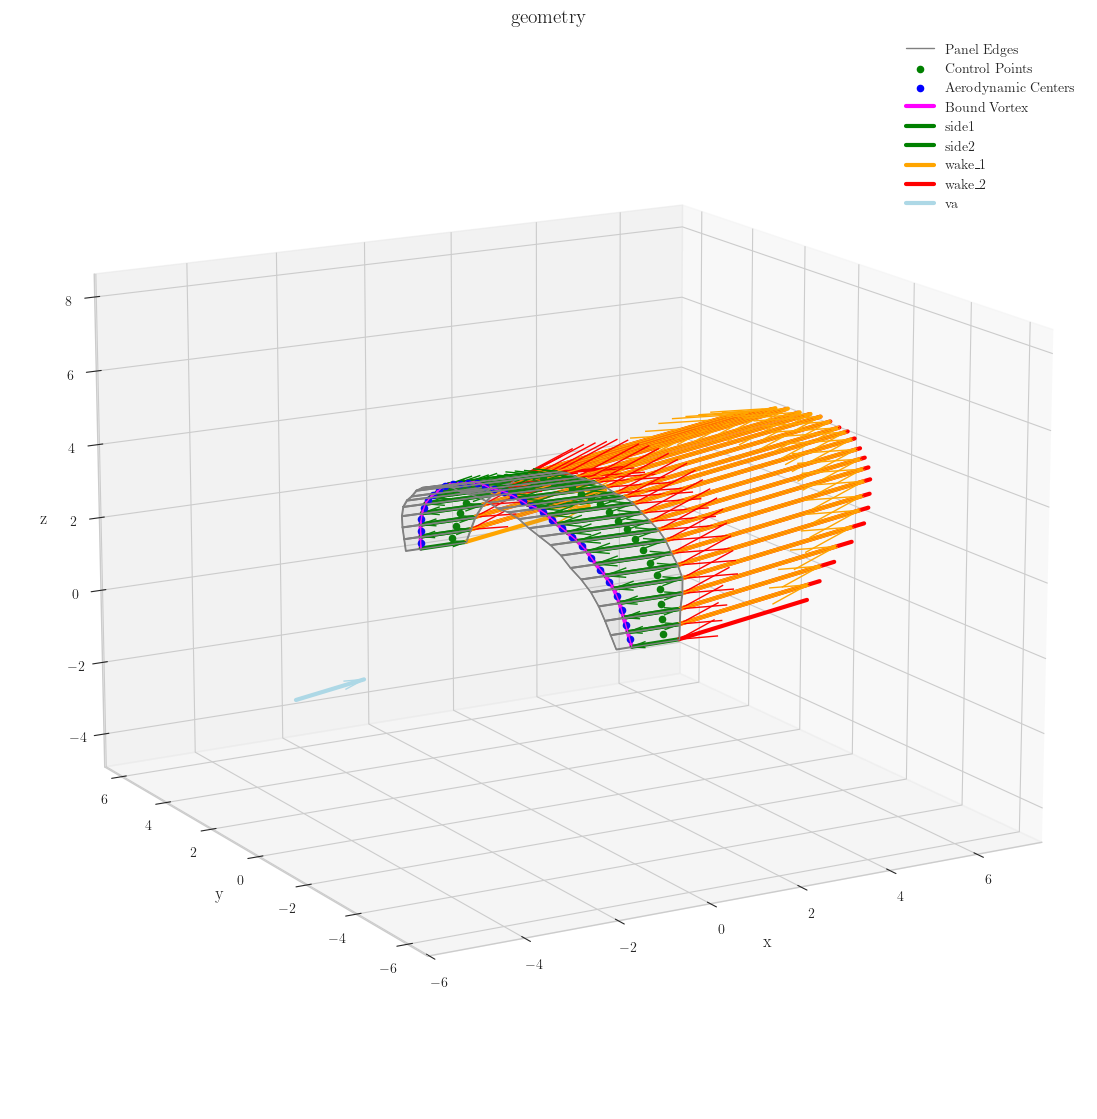

INFO:root:Converged after 467 iterations


In [9]:
# Set the flow conditions
aoa = np.deg2rad(10)
sideslip = 0
Umag = 20
wing_aero.va = (
    np.array([np.cos(aoa) * np.cos(sideslip), np.sin(sideslip), np.sin(aoa)]) * Umag,
    0,
)

# ### Plotting the wing
save_path = Path(root_dir) / "results" / "TUDELFT_V3_LEI_KITE" 
plotting.plot_geometry(
    wing_aero,
    title="geometry",
    data_type=".pdf",
    save_path=save_path,
    is_save=True,
    is_show=True,
)

### Solve the aerodynamics
# cl,cd,cs coefficients are flipped to "normal ref frame"
# x (+) downstream, y(+) left and z-up reference frame
solver = Solver(aerodynamic_model_type="VSM")
result = solver.solve(wing_aero)

## 4. Store the results in results folder

We `plot` the resulting `distributions` and `polars`

INFO:root:Converged after 443 iterations
INFO:root:Converged after 432 iterations
INFO:root:Converged after 426 iterations
INFO:root:Converged after 422 iterations
INFO:root:Converged after 419 iterations
INFO:root:Converged after 417 iterations
INFO:root:Converged after 416 iterations
INFO:root:Converged after 415 iterations
INFO:root:Converged after 416 iterations
INFO:root:Converged after 417 iterations
INFO:root:Converged after 420 iterations
INFO:root:Converged after 423 iterations
INFO:root:Converged after 428 iterations
INFO:root:Converged after 434 iterations
INFO:root:Converged after 441 iterations
INFO:root:Converged after 450 iterations
INFO:root:Converged after 462 iterations
INFO:root:Converged after 478 iterations
INFO:root:Converged after 500 iterations
INFO:root:Converged after 533 iterations


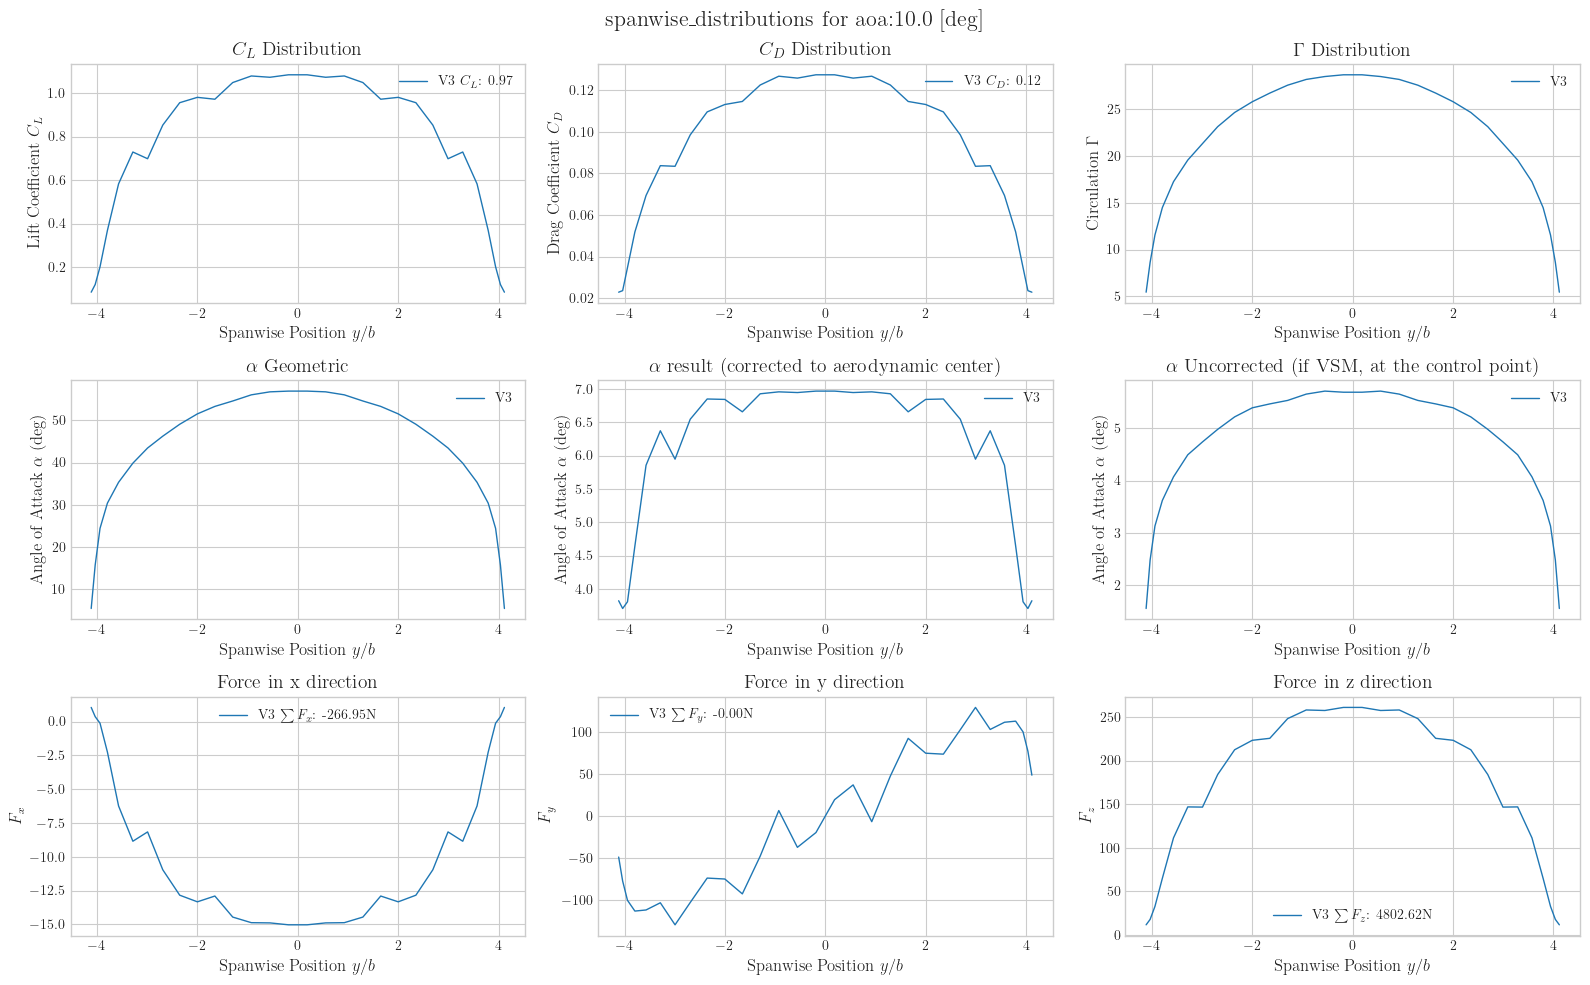

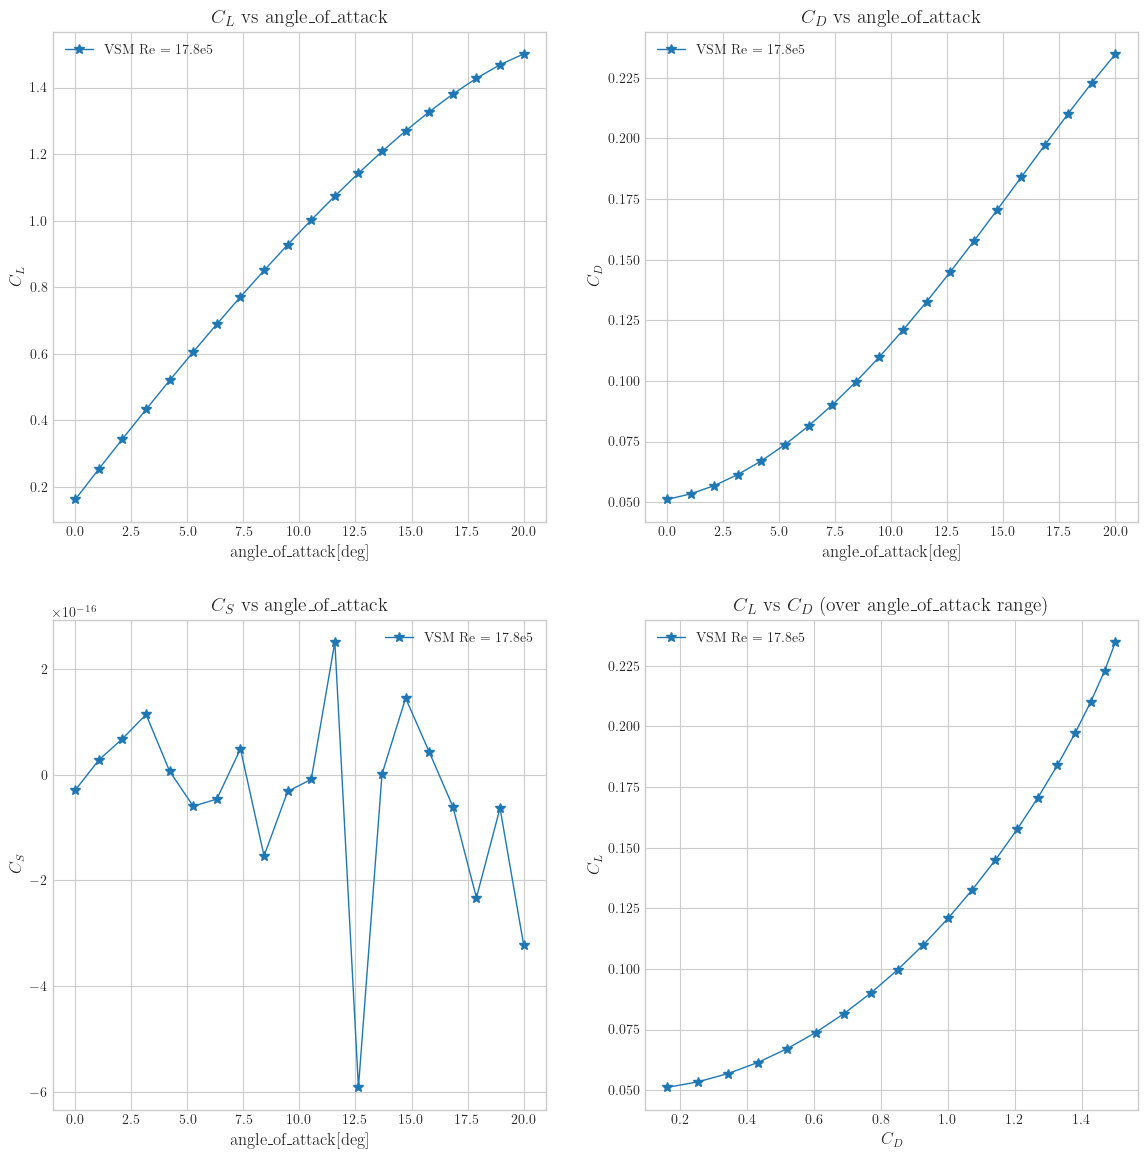

In [10]:
### plotting distributions
plotting.plot_distribution(
    y_coordinates_list=[[panel.aerodynamic_center[1] for panel in wing_aero.panels]],
    results_list=[result],
    label_list=["V3"],
    title=f"spanwise_distributions for aoa:{np.rad2deg(aoa):.1f} [deg]",
    data_type=".pdf",
    save_path=save_path,
    is_save=True,
    is_show=False,
)

### plotting polar
plotting.plot_polars(
    solver_list=[solver],
    wing_aero_list=[wing_aero],
    label_list=["VSM"],
    literature_path_list=[],
    angle_range=np.linspace(0, 20, 20),
    angle_type="angle_of_attack",
    angle_of_attack=0,
    side_slip=0,
    yaw_rate=0,
    Umag=10,
    title="rectangular_wing_polars",
    data_type=".pdf",
    save_path=save_path,
    is_save=True,
    is_show=False,
)
